In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,Unnamed: 0,Very low frequency power,VLF component (%),Low frequency power,LF component (%),Low frequency in normalized units,High frequency power,HF component (%),High frequency in normalized units,Total RR interval power,...,RR differences > 25 ms (%),RR differences > 50 ms (%),RR interval kurtosis,RR interval skewness,Average relative RR intervals,Median relative RR intervals,Relative RR variability,RMS of relative RR differences,Variation of relative RR differences,Patient's condition
0,244435,1254.975811,57.890929,901.004602,41.479506,98.173273,15.847376,0.728107,1.730184,2169.995916,...,7.3926,0.000000,-0.045043,-0.158011,-0.000073,-0.000378,0.016513,0.007952,0.007968,disturbed
1,24119,8691.867667,93.662416,557.400294,5.994471,93.023670,41.203154,0.442227,6.890097,9289.275104,...,15.3846,2.936267,-0.721847,-0.501405,-0.000131,0.000037,0.025143,0.015671,0.015702,stress
2,129126,941.999352,67.088870,435.381922,30.945797,93.649782,29.057534,2.061206,6.262731,1405.510857,...,1.4652,0.000000,-0.277983,-0.080453,0.000080,0.000668,0.013346,0.007190,0.007205,Calm
3,120498,951.732602,69.917040,382.366064,28.033598,92.786010,29.316362,2.145068,7.128232,1362.592486,...,0.7992,0.000000,0.001528,0.254826,0.000162,-0.000060,0.012779,0.007273,0.007288,Calm
4,310661,1696.321425,72.242287,623.055076,26.481415,94.964483,32.381571,1.373549,4.945398,2350.448508,...,4.9284,0.200200,0.172188,0.047651,0.000088,0.001038,0.015351,0.007889,0.007905,Calm


In [3]:
train.shape

(184644, 33)

In [4]:
train.isnull().sum()

Unnamed: 0                              0
Very low frequency power                0
VLF component (%)                       0
Low frequency power                     0
LF component (%)                        0
Low frequency in normalized units       0
High frequency power                    0
HF component (%)                        0
High frequency in normalized units      0
Total RR interval power                 0
LF to HF ratio                          0
HF to LF ratio                          0
Poincaré plot SD perpendicular          0
Poincaré plot SD along identity         0
sampen                                  0
Higuchi fractal dimension               0
Average RR intervals                    0
Median RR intervals                     0
RR interval variability                 0
Root mean square of RR differences      0
Variation of RR differences             0
SDRR to RMSSD ratio                     0
Heart_Rate                              0
RR differences > 25 ms (%)        

In [5]:
train.duplicated().sum()

0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184644 entries, 0 to 184643
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            184644 non-null  int64  
 1   Very low frequency power              184644 non-null  float64
 2   VLF component (%)                     184644 non-null  float64
 3   Low frequency power                   184644 non-null  float64
 4   LF component (%)                      184644 non-null  float64
 5   Low frequency in normalized units     184644 non-null  float64
 6   High frequency power                  184644 non-null  float64
 7   HF component (%)                      184644 non-null  float64
 8   High frequency in normalized units    184644 non-null  float64
 9   Total RR interval power               184644 non-null  float64
 10  LF to HF ratio                        184644 non-null  float64
 11  

In [7]:
test = pd.read_csv("Test.csv")
test.head()

,Unnamed: 0,Very low frequency power,VLF component (%),Low frequency power,LF component (%),Low frequency in normalized units,High frequency power,HF component (%),High frequency in normalized units,Total RR interval power,...,RR differences > 25 ms (%),RR differences > 50 ms (%),RR interval kurtosis,RR interval skewness,Average relative RR intervals,Median relative RR intervals,Relative RR variability,RMS of relative RR differences,Variation of relative RR differences,Patient's condition
0,329723,718.279862,37.481682,1189.360880,61.939891,98.817650,13.027067,0.677072,1.084516,1918.265436,...,6.9264,0.000000,-0.425943,0.065630,0.000099,-0.001897,0.017034,0.007355,0.007370,disturbed
1,122441,5214.388791,84.101779,984.518339,15.847363,98.957974,9.372078,0.150557,0.943912,6206.293413,...,10.9224,1.201200,2.048374,0.020589,0.000025,0.000945,0.021838,0.009722,0.009741,stress
2,173015,5569.676934,82.805104,1138.325715,16.889821,97.560180,27.300865,0.404265,2.344504,6732.974590,...,14.3190,2.469133,1.595684,1.010021,0.000109,-0.000504,0.021682,0.010512,0.010533,stress
3,209362,1151.124351,33.471472,2209.534855,64.118719,96.136899,86.488156,2.504794,3.770635,3442.559903,...,23.9094,0.734067,-0.639722,0.079405,-0.000036,-0.001525,0.028175,0.014375,0.014404,disturbed
4,336393,868.444194,59.415372,568.871835,38.842104,95.375732,26.985150,1.838843,4.533325,1463.110656,...,7.0596,0.133467,-0.419051,-0.214816,-0.000049,-0.001246,0.016175,0.009847,0.009867,stress


In [8]:
test.shape

(184645, 32)

In [9]:
test.isnull().sum()

Unnamed: 0                              0
Very low frequency power                0
VLF component (%)                       0
Low frequency power                     0
LF component (%)                        0
Low frequency in normalized units       0
High frequency power                    0
HF component (%)                        0
High frequency in normalized units      0
Total RR interval power                 0
LF to HF ratio                          0
HF to LF ratio                          0
Poincaré plot SD perpendicular          0
Poincaré plot SD along identity         0
sampen                                  0
Higuchi fractal dimension               0
Average RR intervals                    0
Median RR intervals                     0
RR interval variability                 0
Root mean square of RR differences      0
Variation of RR differences             0
SDRR to RMSSD ratio                     0
RR differences > 25 ms (%)              0
RR differences > 50 ms (%)        

In [10]:
test.duplicated().sum()

0

In [11]:
train['Patient\'s condition'].value_counts()

Patient's condition
Calm         100069
disturbed     52565
stress        32010
Name: count, dtype: int64

In [12]:
set(train.columns)-set(test.columns)

{'Heart_Rate'}

<Axes: ylabel='Heart_Rate'>

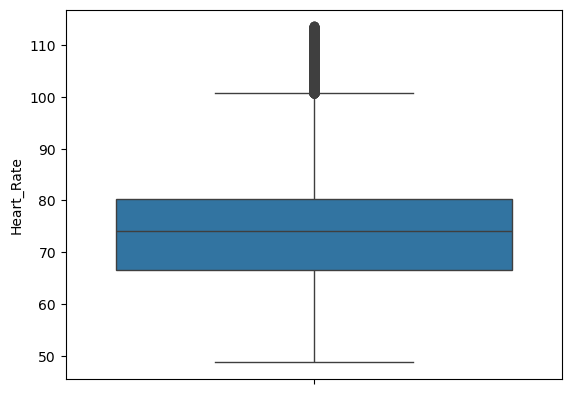

In [13]:
sns.boxplot(train['Heart_Rate'])

In [14]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(369289, 33)

In [15]:
numerical_columns = combined.select_dtypes(exclude = 'object')

In [16]:
numerical_columns.shape

(369289, 32)

In [18]:
le = LabelEncoder()
combined['Patient_condition_encoded'] = le.fit_transform(combined["Patient\'s condition"])

In [19]:
condition_avg_heart_rate = combined.groupby('Patient\'s condition')['Heart_Rate'].transform('mean')
combined['Avg_Heart_Rate_by_Condition'] = condition_avg_heart_rate

In [20]:
# Time-based features (synthetic for now)
combined['Time_Index'] = np.arange(len(combined))
combined['Is_Weekend'] = combined['Time_Index'] % 2

In [21]:
combined = combined.drop(columns=['Patient\'s condition', 'Unnamed: 0'])

In [22]:
# LF to HF combined ratio
combined['LF_HF_combined'] = combined['LF to HF ratio'] + combined['HF to LF ratio']

# Difference between LF and HF components (%)
combined['LF_HF_diff_percent'] = combined['LF component (%)'] - combined['HF component (%)']

# Ratio of Average to Median RR intervals
combined['Avg_Median_RR_ratio'] = combined['Average RR intervals'] / (combined['Median RR intervals'] + 1e-5)  # Avoid division by zero

# Normalized difference of Low and High frequency components
combined['Normalized_LF_HF_diff'] = combined['Low frequency in normalized units'] - combined['High frequency in normalized units']

# Sum of LF and HF power
combined['LF_HF_power_sum'] = combined['Low frequency power'] + combined['High frequency power']


In [23]:
newtrain = combined.iloc[0:184644,:]
newtrain.shape

(184644, 40)

In [24]:
newtest = combined.iloc[184644:, :]
newtest.shape

(184645, 40)

In [25]:
X = newtrain.drop(columns=['Heart_Rate'])
y = newtrain['Heart_Rate']

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
models = {'Logistic Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(),
         'Bagging': BaggingRegressor(), 'Extra Tree': ExtraTreesRegressor(), 'LightGBM': LGBMRegressor(),
         'Gradient Boosting': GradientBoostingRegressor(), 'Adaboost': AdaBoostRegressor(),
         'XGB': XGBRegressor()}

In [29]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(X_train, y_train).predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = rmse
    return results

In [58]:
results = evaluate_models(X_train, X_test, y_train, y_test, models)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9018
[LightGBM] [Info] Number of data points in the train set: 147715, number of used features: 39
[LightGBM] [Info] Start training from score 73.862948


In [59]:
best_model_name = min(results, key = results.get)
best_model = models[best_model_name]

In [67]:
print(f"best model is {best_model_name} with rmse {results[best_model_name]}")

best model is Extra Tree with rmse 0.013839215783378444


In [69]:
y_pred = best_model.fit(X_train, y_train).predict(X_test)

In [72]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.013773354118103777


In [74]:
x_train = newtrain.drop('Heart_Rate', axis = 1)
y_train = newtrain['Heart_Rate']
x_test = newtest.drop('Heart_Rate', axis = 1)
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [75]:
solution = pd.DataFrame({'Heart_Rate' : y_pred})
solution.head()

,Heart_Rate
0,72.517902
1,64.022100
2,65.650655
3,82.760330
4,69.340038


In [76]:
solution.to_csv('Solution.csv', index = False)